Mount Google Drive to Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Basic python library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read The Datasets

In [3]:
variant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_variants.csv')
print('Total Number of Datapoints: ', variant_df.shape[0])
print('Total Number of Features: ', variant_df.shape[1])
print('All Features Name: ', variant_df.columns.values)
variant_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  4
All Features Name:  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
815,815,ERCC2,L461V,1
2170,2170,PTEN,S227F,4
659,659,CDKN2A,D74N,4
823,823,BRIP1,P47A,4
758,758,ERBB2,G776delinsLC,7


In [4]:
text_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_text.csv', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Total Number of Datapoints: ', text_df.shape[0])
print('Total Number of Features: ', text_df.shape[1])
print('All Features Name: ', text_df.columns.values)
text_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  2
All Features Name:  ['ID' 'TEXT']


,ID,TEXT
3098,3098,Members of the RAS superfamily of small guanos...
39,39,Human Dicer contains two RNase III domains (RN...
2105,2105,"Rhabdomyosarcoma (RMS), a cancer of skeletal m..."
1898,1898,Genes encoding components of the PI3K-Akt-mTOR...
2821,2821,Mutation screening of the breast and ovarian c...


Cleanup Raw Text  

In [5]:
import re
from wordcloud import STOPWORDS, WordCloud

In [6]:
stop_words = set(STOPWORDS)

def clean_text(total_text, index, column):
  if type(total_text) is not int:
    text = ''

    # replace every special char with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)

    # replace multiple spaces with single space
    total_text = re.sub('\s+', ' ', total_text)

    # converting all the chars into lower-case.
    total_text = total_text.lower()

    # Combining all the above sentence

    from tqdm import tqdm
    # tqdm is for printing the status bar

    for word in tqdm(total_text.split()):
    # if the word is a not a stop word then retain that word from the data
      if not word in stop_words:
        text += word + ' '

    text_df[column][index] = text

    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in total_text:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

Preprocess text

In [7]:
for index, row in text_df.iterrows():
  if type(row['TEXT']) is str:
    clean_text(row['TEXT'], index, 'TEXT')
  else:
    print('There is no text description for ID: ', index)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 4649/4649 [00:00<00:00, 772464.42it/s]
<ipython-input-6-69a3375a3258>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the d

There is no text description for ID:  1109


100%|██████████| 15609/15609 [00:00<00:00, 996345.88it/s]
<ipython-input-6-69a3375a3258>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is t

There is no text description for ID:  1277


100%|██████████| 21096/21096 [00:00<00:00, 854999.44it/s]
<ipython-input-6-69a3375a3258>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is t

There is no text description for ID:  1407


100%|██████████| 5664/5664 [00:00<00:00, 688695.11it/s]
<ipython-input-6-69a3375a3258>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is try

There is no text description for ID:  1639


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6726/6726 [00:00<00:00, 947628.11it/s]
<ipython-input-6-69a3375a3258>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the d

There is no text description for ID:  2755


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 11428/11428 [00:00<00:00, 1156756.19it/s]
<ipython-input-6-69a3375a3258>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in th

In [8]:
#merging both gene_variations and text data based on ID
df = pd.merge(variant_df, text_df, on='ID', how='left')
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [9]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [10]:
df.loc[df['TEXT'].isnull(), 'TEXT'] = df['Gene']+' '+df['Variation']

In [11]:
df[df['ID']==1407]

,ID,Gene,Variation,Class,TEXT
1407,1407,FGFR3,K508M,6,FGFR3 K508M


In [12]:
df.sample(5)

,ID,Gene,Variation,Class,TEXT
1115,1115,FANCA,W183A,4,fanconi anemia fa recessively inherited diseas...
572,572,SMAD3,V277D,4,transforming growth factor tgf activates trans...
3045,3045,KIT,K550_W557del,7,purpose kit major oncogenic driver gastrointes...
601,601,SMAD4,R496H,4,although colorectal mucinous adenocarcinomas m...
926,926,PDGFRA,560_561insER,7,determine potential crenolanib potent inhibito...


In [13]:
df['Gene_Variation_TEXT'] = df['Gene']+' '+df['Variation']+' '+df['TEXT']

Define input and output/target features

In [14]:
y = df['Class']
X = df['Gene_Variation_TEXT']

In [15]:
X

,Gene_Variation_TEXT
0,FAM58A Truncating Mutations cyclin dependent k...
1,CBL W802* abstract background non small cell l...
2,CBL Q249E abstract background non small cell l...
3,CBL N454D recent evidence demonstrated acquire...
4,CBL L399V oncogenic mutations monomeric casita...
...,...
3316,RUNX1 D171N introduction myelodysplastic syndr...
3317,RUNX1 A122* introduction myelodysplastic syndr...
3318,RUNX1 Fusions runt related transcription facto...
3319,RUNX1 R80C runx1 aml1 gene frequent target chr...


Split train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2656,), (665,), (2656,), (665,))

Apply Count Vectorizer to embed the words in n dimentional space of Vector

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,3))

Fit and Transform Count Vectorizer for Visualization

In [19]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [20]:
X_train.shape, X_test.shape

((2656, 10000), (665, 10000))

Evaluating KNeighbors
**********************************************
Train Result:
Accuracy Score: 68.90%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.597194  0.656388  0.625393   454.000000
2              0.650155  0.589888  0.618557   356.000000
3              0.438596  0.357143  0.393701    70.000000
4              0.701954  0.787934  0.742463   547.000000
5              0.582418  0.552083  0.566845   192.000000
6              0.782609  0.626087  0.695652   230.000000
7              0.772251  0.777339  0.774787   759.000000
8              0.600000  0.333333  0.428571    18.000000
9              0.869565  0.666667  0.754717    30.000000
accuracy       0.689006  0.689006  0.689006     0.689006
macro avg      0.666083  0.594096  0.622298  2656.000000
weighted avg   0.689797  0.689006  0.687152  2656.000000
_______________________________________________
Confusion Matrix: 
[[298  15   2  

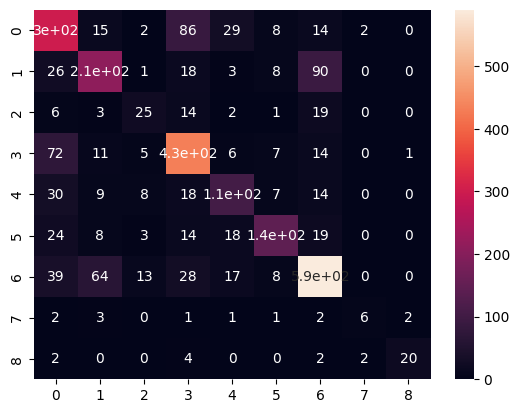

None
************************************************************************
Test Result:
Accuracy Score: 60.75%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.515385  0.587719  0.549180  114.000000
2              0.554217  0.479167  0.513966   96.000000
3              0.888889  0.421053  0.571429   19.000000
4              0.600000  0.669065  0.632653  139.000000
5              0.346154  0.360000  0.352941   50.000000
6              0.697674  0.666667  0.681818   45.000000
7              0.732620  0.706186  0.719160  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.714286  0.833333    7.000000
accuracy       0.607519  0.607519  0.607519    0.607519
macro avg      0.592771  0.511571  0.539387  665.000000
weighted avg   0.616660  0.607519  0.608154  665.000000
_______________________________________________
Confusion Matrix: 
[[ 67   3   0  30   

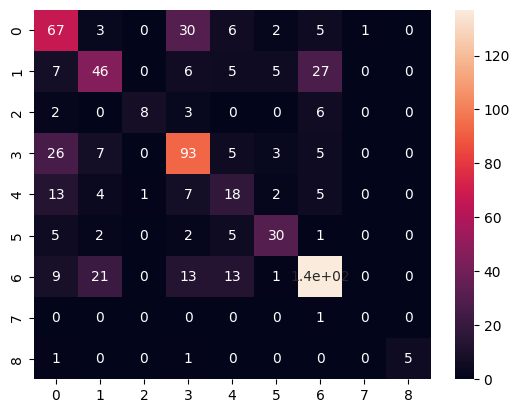

None
************************************************************************


Evaluating SupportVectorMachine
**********************************************
Train Result:
Accuracy Score: 70.41%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.682573  0.724670  0.702991   454.000000
2              0.868421  0.463483  0.604396   356.000000
3              1.000000  0.014286  0.028169    70.000000
4              0.762324  0.791590  0.776682   547.000000
5              0.588235  0.260417  0.361011   192.000000
6              0.895105  0.556522  0.686327   230.000000
7              0.637619  0.973650  0.770594   759.000000
8              1.000000  0.222222  0.363636    18.000000
9              0.875000  0.700000  0.777778    30.000000
accuracy       0.704066  0.704066  0.704066     0.704066
macro avg      0.812142  0.522982  0.563509  2656.000000
weighted avg   0.735337  0.704066  0.678866  2656

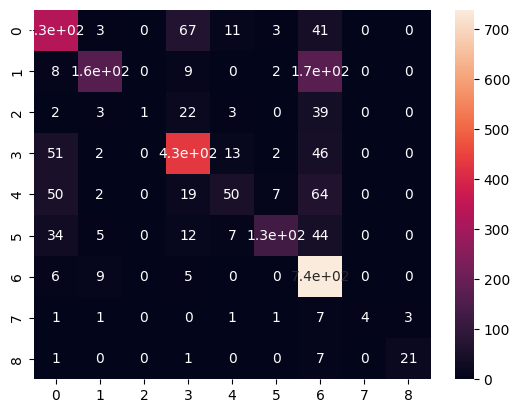

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Result:
Accuracy Score: 61.50%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.526316  0.614035  0.566802  114.000000
2              0.739130  0.354167  0.478873   96.000000
3              1.000000  0.105263  0.190476   19.000000
4              0.666667  0.604317  0.633962  139.000000
5              0.538462  0.140000  0.222222   50.000000
6              0.852941  0.644444  0.734177   45.000000
7              0.583062  0.922680  0.714571  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.571429  0.727273    7.000000
accuracy       0.615038  0.615038  0.615038    0.615038
macro avg      0.656286  0.439593  0.474262  665.000000
weighted avg   0.643673  0.615038  0.586758  665.000000
_______________________________________________
Confusion Matrix: 
[[ 70   1   0  23   2   0  18   0   0]
 [  2  34   0   0   0   2  58   0   0]
 [  2   0   2   4   

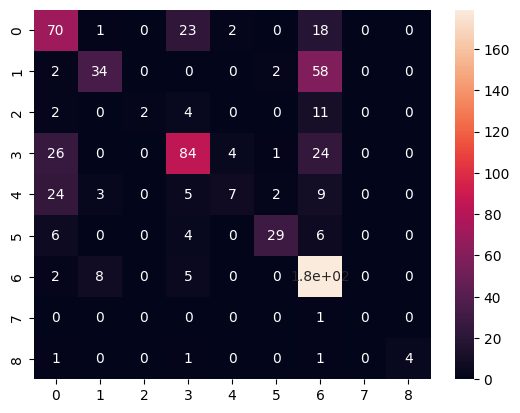

None
************************************************************************


Evaluating LogisticRegression
**********************************************
Train Result:
Accuracy Score: 85.39%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.866511  0.814978  0.839955   454.000000
2              0.871658  0.915730  0.893151   356.000000
3              0.453237  0.900000  0.602871    70.000000
4              0.931102  0.864717  0.896682   547.000000
5              0.559259  0.786458  0.653680   192.000000
6              0.845833  0.882609  0.863830   230.000000
7              0.984472  0.835310  0.903778   759.000000
8              0.857143  1.000000  0.923077    18.000000
9              0.909091  1.000000  0.952381    30.000000
accuracy       0.853916  0.853916  0.853916     0.853916
macro avg      0.808701  0.888867  0.836600  2656.000000
weighted avg   0.879737  0.853916  0.861193  2656.0

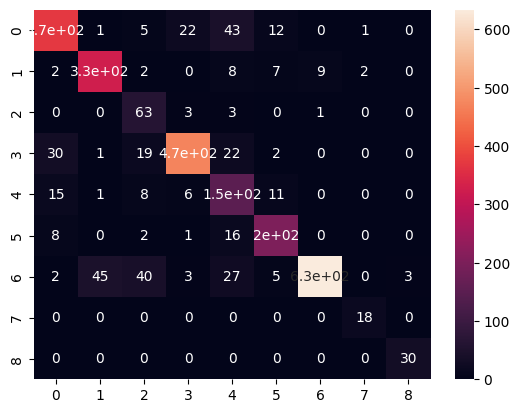

None
************************************************************************
Test Result:
Accuracy Score: 62.26%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.583333  0.614035  0.598291  114.000000
2              0.549451  0.520833  0.534759   96.000000
3              0.464286  0.684211  0.553191   19.000000
4              0.700000  0.654676  0.676580  139.000000
5              0.338710  0.420000  0.375000   50.000000
6              0.704545  0.688889  0.696629   45.000000
7              0.724324  0.690722  0.707124  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.571429  0.727273    7.000000
accuracy       0.622556  0.622556  0.622556    0.622556
macro avg      0.562739  0.538310  0.540983  665.000000
weighted avg   0.633876  0.622556  0.626269  665.000000
_______________________________________________
Confusion Matrix: 
[[ 70   5   1  19   

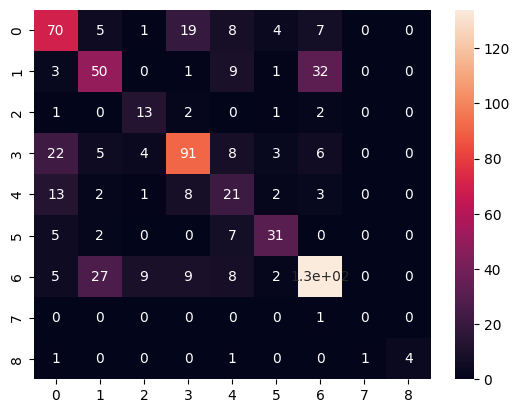

None
************************************************************************


Evaluating DecisionTree
**********************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Result:
Accuracy Score: 54.52%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.364791  0.885463  0.516710   454.000000
2              0.631579  0.202247  0.306383   356.000000
3              0.000000  0.000000  0.000000    70.000000
4              0.908213  0.343693  0.498674   547.000000
5              0.833333  0.208333  0.333333   192.000000
6              0.959016  0.508696  0.664773   230.000000
7              0.591722  0.828722  0.690450   759.000000
8              0.000000  0.000000  0.000000    18.000000
9              0.000000  0.000000  0.000000    30.000000
accuracy       0.545181  0.545181  0.545181     0.545181
macro avg      0.476517  0.330795  0.334480  2656.000000
weighted avg   0.646438  0.545181  0.511063  2656.000000
_______________________________________________
Confusion Matrix: 
[[402   3   0   5   3   3  38   0   0]
 [109  72   0   0   0   1 174   0   0]
 [ 21 

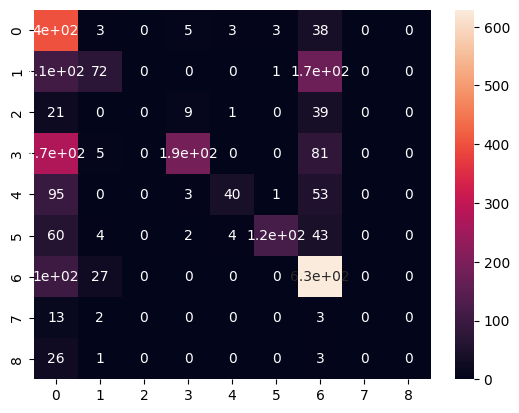

None
************************************************************************
Test Result:
Accuracy Score: 50.38%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.336996  0.807018  0.475452  114.000000
2              0.440000  0.114583  0.181818   96.000000
3              0.000000  0.000000  0.000000   19.000000
4              0.711538  0.266187  0.387435  139.000000
5              1.000000  0.140000  0.245614   50.000000
6              0.828571  0.644444  0.725000   45.000000
7              0.582418  0.819588  0.680942  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.000000  0.000000  0.000000    7.000000
accuracy       0.503759  0.503759  0.503759    0.503759
macro avg      0.433280  0.310202  0.299585  665.000000
weighted avg   0.571182  0.503759  0.454914  665.000000
_______________________________________________
Confusion Matrix: 
[[ 92   2   0   2   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Heatmap of Confusion Matrix: 
Axes(0.125,0.11;0.62x0.77)



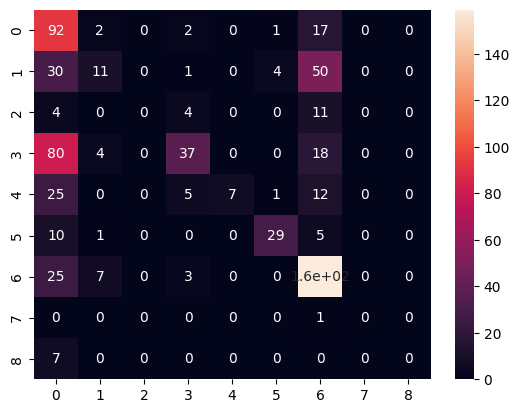

None
************************************************************************


Evaluating RandomForest
**********************************************
Train Result:
Accuracy Score: 81.48%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.724820  0.887665  0.798020   454.000000
2              0.980620  0.710674  0.824104   356.000000
3              0.785714  0.157143  0.261905    70.000000
4              0.853147  0.892139  0.872207   547.000000
5              0.810526  0.401042  0.536585   192.000000
6              0.964912  0.717391  0.822943   230.000000
7              0.769151  0.978920  0.861449   759.000000
8              1.000000  0.166667  0.285714    18.000000
9              1.000000  0.700000  0.823529    30.000000
accuracy       0.814759  0.814759  0.814759     0.814759
macro avg      0.876543  0.623516  0.676273  2656.000000
weighted avg   0.831768  0.814759  0.800867  2656.000000


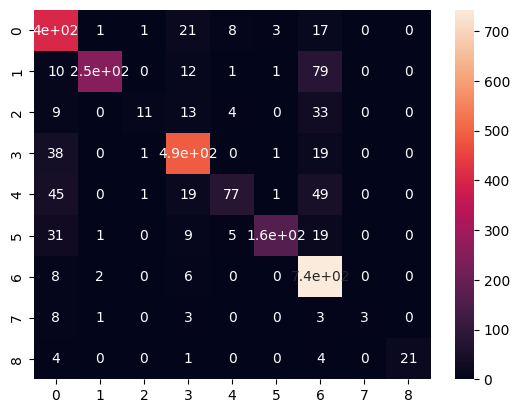

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Result:
Accuracy Score: 66.02%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score    support
1              0.525641  0.719298  0.607407  114.00000
2              0.866667  0.406250  0.553191   96.00000
3              1.000000  0.105263  0.190476   19.00000
4              0.726562  0.669065  0.696629  139.00000
5              0.473684  0.180000  0.260870   50.00000
6              0.857143  0.666667  0.750000   45.00000
7              0.653430  0.932990  0.768577  194.00000
8              0.000000  0.000000  0.000000    1.00000
9              1.000000  0.428571  0.600000    7.00000
accuracy       0.660150  0.660150  0.660150    0.66015
macro avg      0.678125  0.456456  0.491906  665.00000
weighted avg   0.690430  0.660150  0.635938  665.00000
_______________________________________________
Confusion Matrix: 
[[ 82   1   0  13   3   1  14   0   0]
 [  6  39   0   3   5   2  41   0   0]
 [  1   0   2   3   1   0  12   0

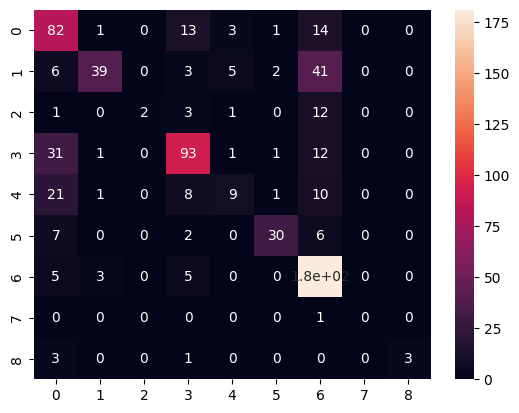

None
************************************************************************


Evaluating GradientBoostingClassifier
**********************************************
Train Result:
Accuracy Score: 84.11%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.800839  0.841410  0.820623   454.000000
2              0.913043  0.825843  0.867257   356.000000
3              0.538462  0.200000  0.291667    70.000000
4              0.816189  0.884826  0.849123   547.000000
5              0.741497  0.567708  0.643068   192.000000
6              0.910377  0.839130  0.873303   230.000000
7              0.854916  0.939394  0.895166   759.000000
8              1.000000  0.944444  0.971429    18.000000
9              1.000000  0.933333  0.965517    30.000000
accuracy       0.841114  0.841114  0.841114     0.841114
macro avg      0.841702  0.775121  0.797461  2656.000000
weighted avg   0.836373  0.841114  0.834490

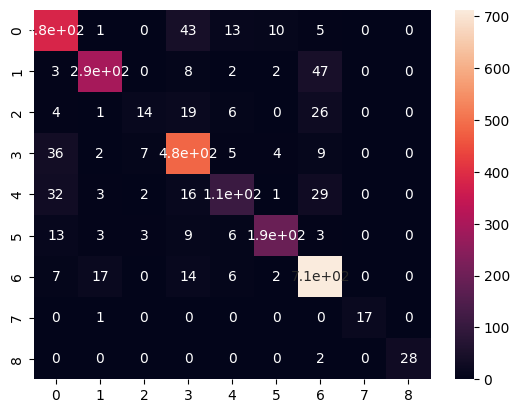

None
************************************************************************
Test Result:
Accuracy Score: 58.95%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.500000  0.526316  0.512821  114.000000
2              0.526316  0.416667  0.465116   96.000000
3              0.500000  0.157895  0.240000   19.000000
4              0.598639  0.633094  0.615385  139.000000
5              0.264706  0.180000  0.214286   50.000000
6              0.720930  0.688889  0.704545   45.000000
7              0.675325  0.804124  0.734118  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.833333  0.714286  0.769231    7.000000
accuracy       0.589474  0.589474  0.589474    0.589474
macro avg      0.513250  0.457919  0.472833  665.000000
weighted avg   0.575580  0.589474  0.576592  665.000000
_______________________________________________
Confusion Matrix: 
[[ 60   1   1  30   

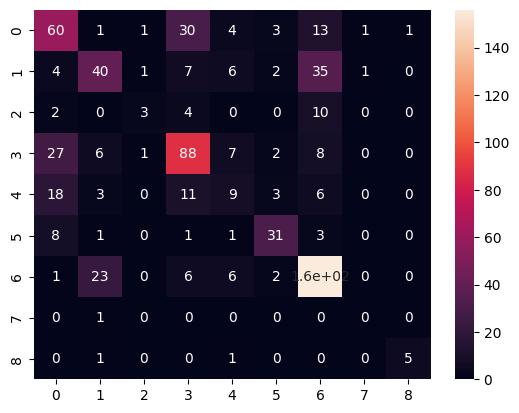

None
************************************************************************


Evaluating AdaBoostClassifier
**********************************************


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-

Train Result:
Accuracy Score: 38.33%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.314286  0.121145  0.174881   454.000000
2              0.000000  0.000000  0.000000   356.000000
3              0.000000  0.000000  0.000000    70.000000
4              0.289147  0.638026  0.397948   547.000000
5              0.000000  0.000000  0.000000   192.000000
6              0.000000  0.000000  0.000000   230.000000
7              0.505532  0.782609  0.614271   759.000000
8              0.027397  0.111111  0.043956    18.000000
9              0.692308  0.600000  0.642857    30.000000
accuracy       0.383283  0.383283  0.383283     0.383283
macro avg      0.203185  0.250321  0.208212  2656.000000
weighted avg   0.265742  0.383283  0.294948  2656.000000
_______________________________________________
Confusion Matrix: 
[[ 55   0   0 310   0   0  64  25   0]
 [ 16   0   0 102   0   0 232   5   1]
 [  3 

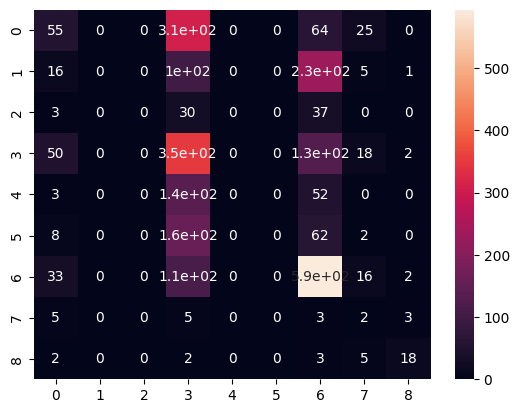

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Result:
Accuracy Score: 39.10%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.368421  0.122807  0.184211  114.000000
2              0.000000  0.000000  0.000000   96.000000
3              0.000000  0.000000  0.000000   19.000000
4              0.307692  0.633094  0.414118  139.000000
5              0.000000  0.000000  0.000000   50.000000
6              0.000000  0.000000  0.000000   45.000000
7              0.482759  0.793814  0.600390  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.800000  0.571429  0.666667    7.000000
accuracy       0.390977  0.390977  0.390977    0.390977
macro avg      0.217652  0.235683  0.207265  665.000000
weighted avg   0.276728  0.390977  0.300308  665.000000
_______________________________________________
Confusion Matrix: 
[[ 14   0   0  69   0   0  25   6   0]
 [  5   0   0  27   0   0  62   2   0]
 [  0   0   0   8   

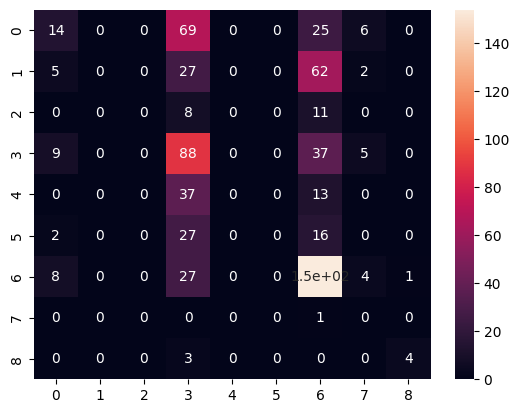

None
************************************************************************




In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True)).transpose()
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")
        print("_______________________________________________")
        print(f"Heatmap of Confusion Matrix: \n{sns.heatmap(confusion_matrix(y_train, pred), annot=True)}\n")
        print(plt.show())
        print('************************************************************************')

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")
        print("_______________________________________________")
        print(f"Heatmap of Confusion Matrix: \n{sns.heatmap(confusion_matrix(y_test, pred), annot=True)}\n")
        print(plt.show())
        print('************************************************************************')

# List of models to evaluate
models = [
    ("KNeighbors", KNeighborsClassifier()),
    ("SupportVectorMachine", SVC()),
    ("LogisticRegression", LogisticRegression(penalty='l2', C=10, class_weight='balanced', random_state=42, solver='lbfgs', n_jobs=-1)),
    ("DecisionTree", DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=0, max_features=None)),
    ("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0)),
    ("AdaBoostClassifier", AdaBoostClassifier(n_estimators = 50, learning_rate = 1))
]

results = []

# Evaluate each model
for name, model in models:
    print(f"Evaluating {name}")
    print('**********************************************')
    model.fit(X_train, y_train)
    print_score(model, X_train, y_train, X_test, y_test, train=True)
    print_score(model, X_train, y_train, X_test, y_test, train=False)
    print("\n")

In [30]:
vc = VotingClassifier(estimators=models, voting='hard') # Also test voting='soft'
vc_model = vc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [31]:
y_pred_train = vc_model.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
f1_train = f1_score(y_pred_train, y_train, average='weighted')

In [32]:
# Show the over all performance on train data
print('Train Data of VC: ','\n')
print('Accuracy on Train Data: ', accuracy_train, '\n')
print('F1_Score on Train Data: ', f1_train, '\n')
print('Classification Report on Train Data: ', '\n', '\n', classification_report(y_pred_train, y_train))

Train Data of VC:  

Accuracy on Train Data:  0.8125 

F1_Score on Train Data:  0.8258124453490489 

Classification Report on Train Data:  
 
               precision    recall  f1-score   support

           1       0.90      0.73      0.81       558
           2       0.68      0.96      0.80       251
           3       0.17      0.55      0.26        22
           4       0.89      0.87      0.88       565
           5       0.38      0.81      0.52        90
           6       0.69      0.95      0.80       167
           7       0.98      0.77      0.86       969
           8       0.50      1.00      0.67         9
           9       0.80      0.96      0.87        25

    accuracy                           0.81      2656
   macro avg       0.67      0.84      0.72      2656
weighted avg       0.87      0.81      0.83      2656



In [33]:
y_pred_test = vc_model.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
f1_test = f1_score(y_pred_test, y_test, average='weighted')

In [34]:
# Show the over all performance on test data
print('Test Data of VC: ','\n')
print('Accuracy on Test Data: ', accuracy_test, '\n' )
print('F1 Score on Test Data: ', f1_test, '\n')
print('Classification Report on Test Data: ', '\n','\n', classification_report(y_pred_test, y_test))

Test Data of VC:  

Accuracy on Test Data:  0.6586466165413534 

F1 Score on Test Data:  0.6807862118497592 

Classification Report on Test Data:  
 
               precision    recall  f1-score   support

           1       0.72      0.51      0.60       161
           2       0.42      0.77      0.54        52
           3       0.16      1.00      0.27         3
           4       0.68      0.74      0.71       128
           5       0.14      0.39      0.21        18
           6       0.67      0.86      0.75        35
           7       0.91      0.67      0.77       263
           8       0.00      0.00      0.00         0
           9       0.71      1.00      0.83         5

    accuracy                           0.66       665
   macro avg       0.49      0.66      0.52       665
weighted avg       0.74      0.66      0.68       665



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Apply Confusion Matrix
from sklearn.metrics import confusion_matrix
c_train = confusion_matrix(y_pred_train, y_train)
c_test  = confusion_matrix(y_pred_test, y_test)

In [36]:
# Results of Confusion Matrix on train and test data
print('Confusion Matrix on Train Data: ','\n', c_train, '\n')
print('Confusion Matrix on Test  Data: ', '\n', c_test)

Confusion Matrix on Train Data:  
 [[408  16   8  39  45  29   8   4   1]
 [  1 242   0   0   2   2   3   1   0]
 [  1   0  12   3   3   3   0   0   0]
 [ 21   5  15 489  20   9   5   0   1]
 [  7   1   2   0  73   7   0   0   0]
 [  5   1   0   2   1 158   0   0   0]
 [ 11  91  33  14  48  22 743   3   4]
 [  0   0   0   0   0   0   0   9   0]
 [  0   0   0   0   0   0   0   1  24]] 

Confusion Matrix on Test  Data:  
 [[ 82   6   1  33  24   7   7   0   1]
 [  1  40   0   1   3   0   7   0   0]
 [  0   0   3   0   0   0   0   0   0]
 [ 16   1   3  95   7   1   4   0   1]
 [  3   5   0   2   7   1   0   0   0]
 [  1   2   0   1   1  30   0   0   0]
 [ 11  42  12   7   8   6 176   1   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5]]


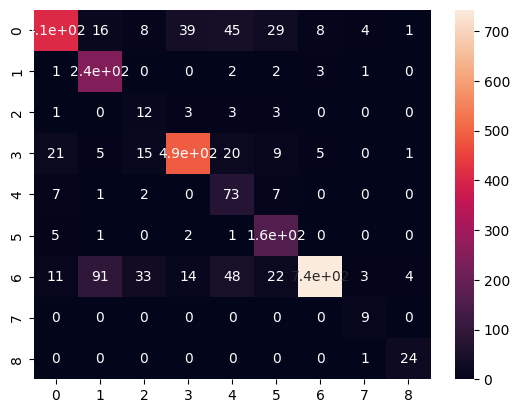

In [37]:
# Apply heatmap on train Data
sns.heatmap(c_train, annot=True)
plt.show()

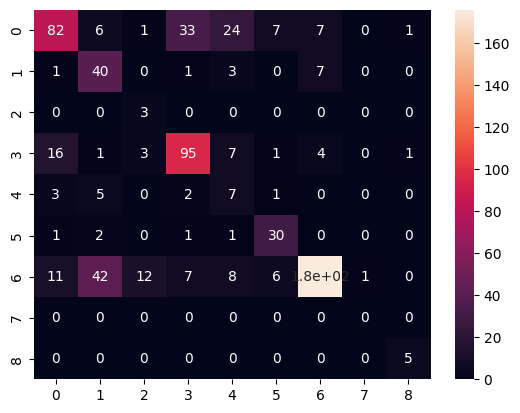

In [38]:
# Apply heatmap on test Data
sns.heatmap(c_test, annot=True)
plt.show()